<a href="https://colab.research.google.com/github/ivanleekk/FIN3702A/blob/main/PS2_Utility_Values_(Students).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.optimize as optimize
import yfinance as yf
from datetime import datetime as dt

### Download Yahoo Finance return data based on tickers.

In [26]:
tickers = ["AVGO","HD","JPM","LLY","MSFT","UNH","V","WMT","XOM"] # Ticker list.

# Start date.
start   = dt(2010, 1, 1)
# End date.
end     = dt(2023, 1, 1)

# Download monthly price data.
prices  = yf.download(" ".join(tickers),start,end,interval="1mo")["Adj Close"]
# Convert prices to returns.
df   = prices.pct_change()[1:]



[                       0%%                      ]

[*********************100%%**********************]  9 of 9 completed


In [27]:
print(len(df))
print(df.mean()*12)

155
Ticker
AVGO    0.334374
HD      0.235408
JPM     0.155538
LLY     0.234598
MSFT    0.211084
UNH     0.250360
V       0.208061
WMT     0.114291
XOM     0.110558
dtype: float64


In [28]:
# annualise by taking overall mean
annualised_returns_simple = df.mean()*12

# annualise arithmetically by year
annualised_returns = df.groupby(df.index.year).sum()
print(annualised_returns)
# annualised_returns.to_csv("annualised_returns.csv")

# annualise by summing every 12 months with a sliding window
annualised_returns_rolling = df.rolling(window=12).sum()
print(annualised_returns_rolling)

Ticker      AVGO        HD       JPM       LLY      MSFT       UNH         V  \
Date                                                                           
2010    0.520138  0.307608  0.121412  0.067741  0.055041  0.113235 -0.111422   
2011    0.071040  0.225316 -0.173035  0.233774 -0.035635  0.372664  0.385146   
2012    0.150616  0.427099  0.372706  0.224252  0.079006  0.099758  0.431188   
2013    0.591005  0.313170  0.337052  0.083033  0.389684  0.361924  0.408299   
2014    0.698588  0.284507  0.103956  0.344785  0.249793  0.329897  0.187851   
2015    0.452954  0.266043  0.106127  0.236574  0.259823  0.179722  0.194035   
2016    0.232243  0.051905  0.326924 -0.083645  0.162021  0.344024  0.022947   
2017    0.418177  0.383136  0.251730  0.172990  0.352589  0.347911  0.395696   
2018    0.057135 -0.052201 -0.049546  0.362528  0.207861  0.158645  0.168788   
2019    0.305348  0.277144  0.413529  0.166950  0.472804  0.214347  0.373623   
2020    0.426184  0.264190  0.009747  0.

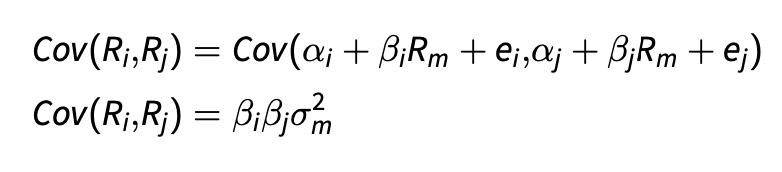

In [29]:
covariance = df.cov()
print(covariance)

Ticker      AVGO        HD       JPM       LLY      MSFT       UNH         V  \
Ticker                                                                         
AVGO    0.006708  0.001976  0.002405  0.000788  0.001811  0.001393  0.001966   
HD      0.001976  0.003776  0.002161  0.000404  0.001753  0.001274  0.001545   
JPM     0.002405  0.002161  0.005540  0.000570  0.002189  0.001523  0.001919   
LLY     0.000788  0.000404  0.000570  0.003549  0.000537  0.000778  0.000568   
MSFT    0.001811  0.001753  0.002189  0.000537  0.003940  0.000916  0.001707   
UNH     0.001393  0.001274  0.001523  0.000778  0.000916  0.003168  0.001094   
V       0.001966  0.001545  0.001919  0.000568  0.001707  0.001094  0.003395   
WMT     0.000443  0.000916  0.000565  0.000388  0.000809  0.000946  0.000699   
XOM     0.001562  0.001550  0.002768  0.000858  0.001213  0.001239  0.001838   

Ticker       WMT       XOM  
Ticker                      
AVGO    0.000443  0.001562  
HD      0.000916  0.001550  
JPM

In [30]:
# Annualized risk-free rate.
rf = 0.01

# Annualized excess return vector.
# re = annualised_returns.mean() - rf # excess because we are subtracting the risk-free rate
# re = annualised_returns_rolling.mean() - rf # excess because we are subtracting the risk-free rate
re = annualised_returns_simple - rf # excess because we are subtracting the risk-free rate
reT = np.atleast_2d(re).T

# Annualized covariance matrix.
cov = df.cov()*12
# cov.to_csv("cov.csv")

# Inverse of the covariance matrix.
icov = pd.DataFrame(np.linalg.pinv(cov.values), cov.columns, cov.index)

# Unit vector.
e = np.ones(len(re))
eT = np.atleast_2d(e).T

e, eT = eT, e
re, reT = reT, re

In [31]:
# print(icov)
# print(annualised_returns.mean())
# print(annualised_returns_rolling.mean())
print(re)

[[0.32437424]
 [0.22540761]
 [0.14553829]
 [0.22459819]
 [0.2010844 ]
 [0.24035973]
 [0.19806125]
 [0.10429104]
 [0.10055803]]


In [32]:
print('e',e)
print('eT',eT)

print('re',re)
print('reT',reT)

e [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
eT [1. 1. 1. 1. 1. 1. 1. 1. 1.]
re [[0.32437424]
 [0.22540761]
 [0.14553829]
 [0.22459819]
 [0.2010844 ]
 [0.24035973]
 [0.19806125]
 [0.10429104]
 [0.10055803]]
reT Ticker
AVGO    0.324374
HD      0.225408
JPM     0.145538
LLY     0.224598
MSFT    0.201084
UNH     0.240360
V       0.198061
WMT     0.104291
XOM     0.100558
dtype: float64


### Implement the Two Fund Separation Theorem to find the optimal portfolio properties.

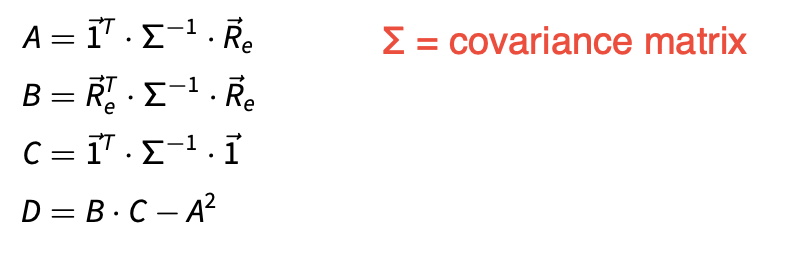

In [33]:
# Two Fund Separation.
A = eT@icov@re
print(A)

B = reT@icov@re
print(B)

C = eT@icov@e
print(C)

D = B*C - A**2
print(D)

# Expected excess return of the tangency portfolio.
r_te  = B/A

# Standard deviation of the tangency portfolio.
var_t = B/(A**2)

print("Expected excess return of the tangency portfolio: \n", r_te)
print("Variance of the tangency portfolio: \n", var_t)

[12.15695291]
[3.22207971]
[66.98846338]
[68.05066478]
Expected excess return of the tangency portfolio: 
 [0.26504008]
Variance of the tangency portfolio: 
 [0.02180152]


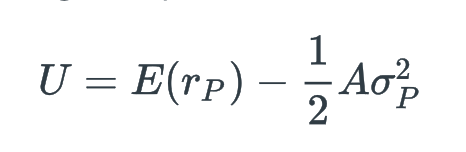

In [34]:
# calculate annualised utility value
A = 6
utility = (r_te + rf) - 0.5 * A * var_t
print("Utility: \n", utility)

Utility: 
 [0.20963551]


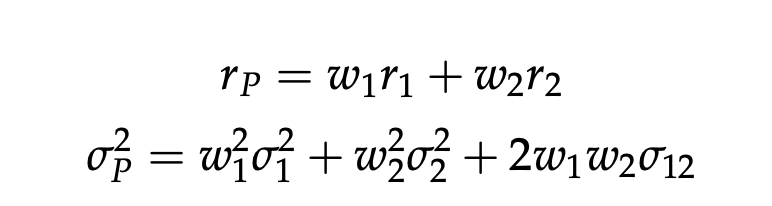

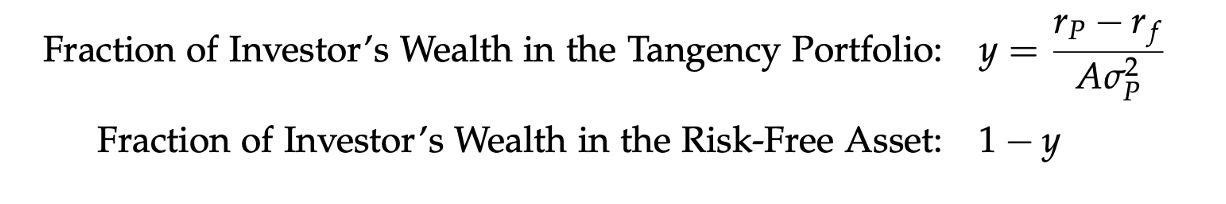

In [35]:
frac_in_tangent = (r_te)/(A*var_t)
print("Fraction of wealth to invest in the tangency portfolio: \n", frac_in_tangent)
frac_in_risk_free = 1 - frac_in_tangent
print("Fraction of wealth to invest in the risk-free asset: \n", frac_in_risk_free)

Fraction of wealth to invest in the tangency portfolio: 
 [2.02615882]
Fraction of wealth to invest in the risk-free asset: 
 [-1.02615882]


In [36]:
ocp_return = frac_in_tangent * (r_te + rf) + frac_in_risk_free * rf # expected return
ocp_sd = frac_in_tangent * var_t**0.5

print("Optimal capital portfolio return: \n", ocp_return)
print("Optimal capital portfolio standard deviation: \n", ocp_sd)

utility = (ocp_return) - 0.5 * A * ocp_sd**2
print("Utility: \n", utility)

Optimal capital portfolio return: 
 [0.54701329]
Optimal capital portfolio standard deviation: 
 [0.29916921]
Utility: 
 [0.27850664]
